# Analysis of the Ca8452 line

In [1]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as f
import sunpy
from matplotlib import transforms
from scipy.io import readsav
from ISPy.io import solarnet
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi3 as un
from importlib import reload
from PIL import Image
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# functies uittesten met Ha

In [3]:
# Specify the path to the folder you want to list files from
folder_path = "D:/solar flares/data/2015-09-27/"
file_n="fits/crispex.6563.10_34_29.time_corrected.aligned.icube"


from ISPy.io import lapalma as lp

#######################################################
# The number of wavelenghts are apriori unknown execpt if not in the icube so ...
number_wavelenghts = 21
# which is an assuption which we will check

cube = lp.read(file_n , 15)
# cube = lp.read(file_n , 21)
print(cube.shape)
number_of_frames = cube.shape[0]


def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= number_of_frames:
        raise IndexError(f'frame number {frame} is not in (0, {number_of_frames}).')
    return folder_path + file_n
    
ttff = timeframe_to_filename_fits


def alternative_datacube(timeframe):
    if timeframe >= number_of_frames or timeframe < 0:
        raise IndexError(f"Timeframe {timeframe} is negative or exeeds numer of frames {number_of_frames}.")
    return cube[timeframe, 0]


(47, 1, 15, 957, 968)


In [4]:
tseries = rs( "tseries.6563.103429.calib.sav")
tseries


{'tstep': 6,
 'clip': array([12,  4,  2,  1], dtype='>i2'),
 'tile': array([ 6,  8, 14, 24], dtype='>i2'),
 'scale': 16.891891,
 'ang': array([ 0.02395867,  0.02289136,  0.02182752,  0.02076482,  0.01970455,
         0.01864848,  0.01759354,  0.01653756,  0.01548435,  0.01443482,
         0.01338644,  0.01234133,  0.01129986,  0.01026197,  0.00922608,
         0.00819263,  0.00715808,  0.00612946,  0.00510115,  0.00407466,
         0.00305073,  0.00203306,  0.00101469,  0.        , -0.00101441,
        -0.00202538, -0.00303407, -0.00403909, -0.00504106, -0.00604136,
        -0.00703769, -0.00803327, -0.00902419, -0.01001234, -0.01099908,
        -0.01198098, -0.01295926, -0.01393553, -0.01491021, -0.01588159,
        -0.01684989, -0.01781471, -0.01877612, -0.01973668, -0.02069403,
        -0.02164522, -0.02259649], dtype='>f8'),
 'shift': array([[ 2.25110433e+00, -2.54094221e+00],
        [ 1.86062783e+00, -1.98586373e+00],
        [ 1.54103460e+00, -1.87253822e+00],
        [ 1.661400

In [5]:
# make good timeline
# 9 frames 16:23:51
# 160 frames from 16:31:11
# assuming constant rate that makes 10 shots on 00:07:40
min_per_frame = (7+40/60) / 10 
print(min_per_frame)
start_time = un.hulp_time("16:23:51")
time_list = [un.minutes_to_time_string(min_per_frame * t, start=start_time) for t in range(number_of_frames)]
time_list

0.7666666666666667


['16:23:00',
 '16:24:00',
 '16:25:00',
 '16:26:00',
 '16:26:00',
 '16:27:00',
 '16:28:00',
 '16:29:00',
 '16:29:00',
 '16:30:00',
 '16:31:00',
 '16:32:00',
 '16:33:00',
 '16:33:00',
 '16:34:00',
 '16:35:00',
 '16:36:00',
 '16:36:00',
 '16:37:00',
 '16:38:00',
 '16:39:00',
 '16:39:00',
 '16:40:00',
 '16:41:00',
 '16:42:00',
 '16:43:00',
 '16:43:00',
 '16:44:00',
 '16:45:00',
 '16:46:00',
 '16:46:00',
 '16:47:00',
 '16:48:00',
 '16:49:00',
 '16:49:00',
 '16:50:00',
 '16:51:00',
 '16:52:00',
 '16:52:00',
 '16:53:00',
 '16:54:00',
 '16:55:00',
 '16:56:00',
 '16:56:00',
 '16:57:00',
 '16:58:00',
 '16:59:00']

In [6]:
zeros = [np.array(alternative_datacube(0)[:, 920, 0]), 
         np.array(alternative_datacube(0)[:, 550, 924]), 
         np.array(alternative_datacube(0)[:, 924, 200])]
alternative_datacube(0).shape, zeros

((15, 957, 968),
 [array([6563, 6175, 5791, 5203, 3841, 2269, 1542, 1382, 1552, 2253, 3826,
         5237, 5796, 5919, 6235], dtype=int16),
  array([6250, 5799, 5311, 4702, 3608, 2196, 1590, 1424, 1502, 2133, 3610,
         5011, 5582, 5695, 6012], dtype=int16),
  array([6517, 6107, 5655, 4892, 3803, 3034, 2882, 2902, 3253, 3748, 4711,
         5362, 5664, 5732, 6147], dtype=int16)])

D:/solar flares/data/2015-09-27/fits/crispex.6563.10_34_29.time_corrected.aligned.icube
the shape of the data is (47, 1, 15, 957, 968)
the wavelengths are self._wavel = array([6561.38999988, 6561.68999995, 6561.89      , 6562.08999999,
       6562.28999998, 6562.48999999, 6562.69      , 6562.89      ,
       6563.09      , 6563.29000001, 6563.49000002, 6563.69000001,
       6563.89      , 6564.09000005, 6564.39000012], dtype='>f8')
(957, 968) (957, 968)
Boundary
Blue=Outside, yellow=Inside


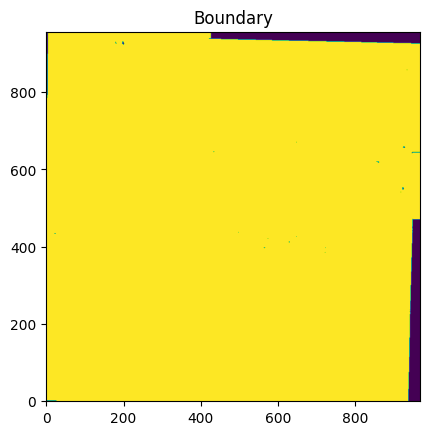

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [7]:
reload(un)
Ha = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename="D:/solar flares/data/2015-06-24/line_data/wav_sstHa.npy", 
    number_of_frames=number_of_frames,
    time=time_list, 
    name_of_line='Ha15a', 
    thresh=[0, np.percentile(alternative_datacube(0), 99.5)],  
    boundary_methode='search', 
    boundary_arguments = {"error":0.03, "zeros":zeros},  #, "index_of_zero":5
    alternative_datacube=alternative_datacube, 
    with_stokes=True,
    with_time=True,
    shape = cube.shape, 
    cont_point=None
)

In [25]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{Ha.shape=}')

the mean cadence is 46.95652173913044 for this line!
Ha.shape=(47, 1, 15, 957, 968)


[[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]] 15


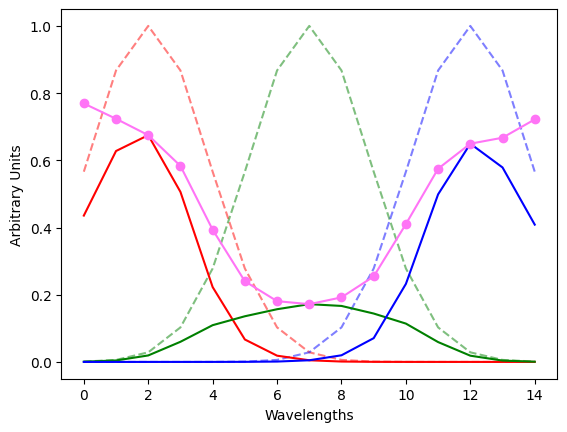

In [8]:
# %matplotlib inline
Meansd = un.guess_filters(len(Ha._wavel))
print(Meansd,len(Ha._wavel) )
Ha.update_filters(Meansd)
Ha.plot_filt(880,900)

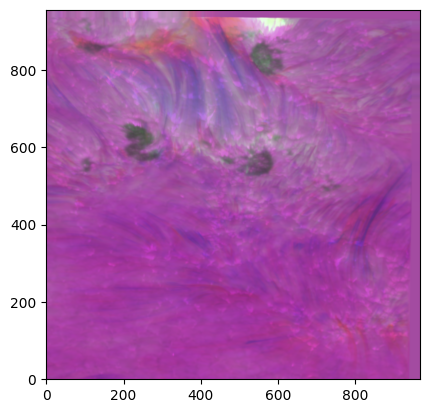

In [9]:
# %matplotlib inline

Ha.ccp_frame(10,Show=False)
Ha.thresh=[1e-7,2e-5]
plt.imshow(Ha.current_ccp[:,:], origin='lower')
# plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
plt.show()

#interesting pixel: (1030, 975)

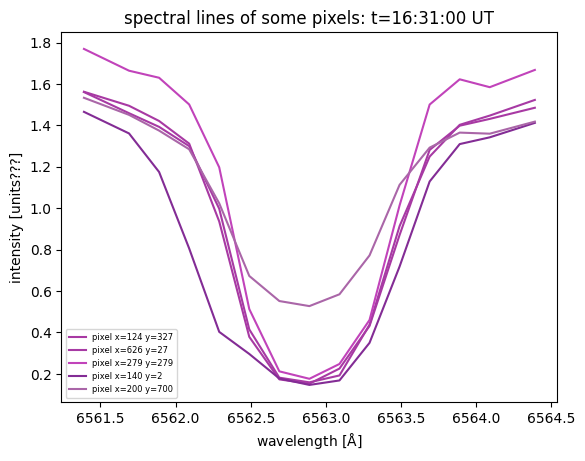

In [10]:
Ha.interesting_pixels( frame=10, pixels=[(600, 600)], rand=True, numb=5)

COCOPLOT at  t=16:23:00 UT (frame number 0 )


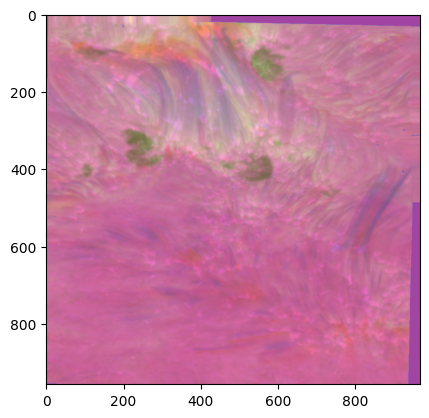

COCOPLOT at  t=16:54:00 UT (frame number 40 )


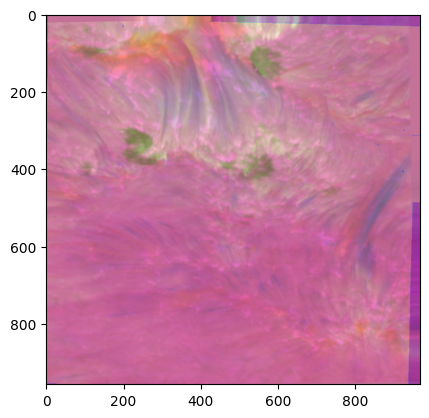

In [11]:
# Many COCOPLOTS
r = Ha._number_of_frames
for i in range(0,r,40):
    tstr = Ha.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    Ha.ccp_frame(i,Show=False)
    plt.imshow(Ha.current_ccp[::-1,:])

    plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
    plt.show()


COCOPLOT at  t=16:46:00 UT (frame number 30 )


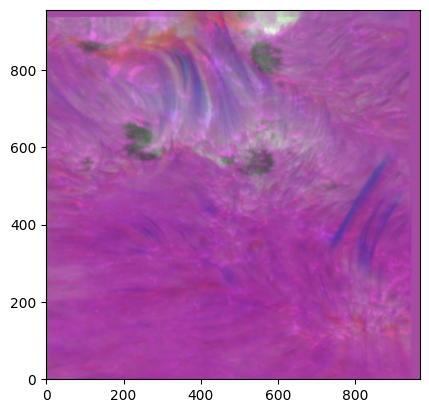

In [12]:
Ha.ccp_frame(30)
pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# Haurrent_ccp[0:30:5,0:60:5,:]

In [13]:
Ha.calculate__FOV_spect_over_time()


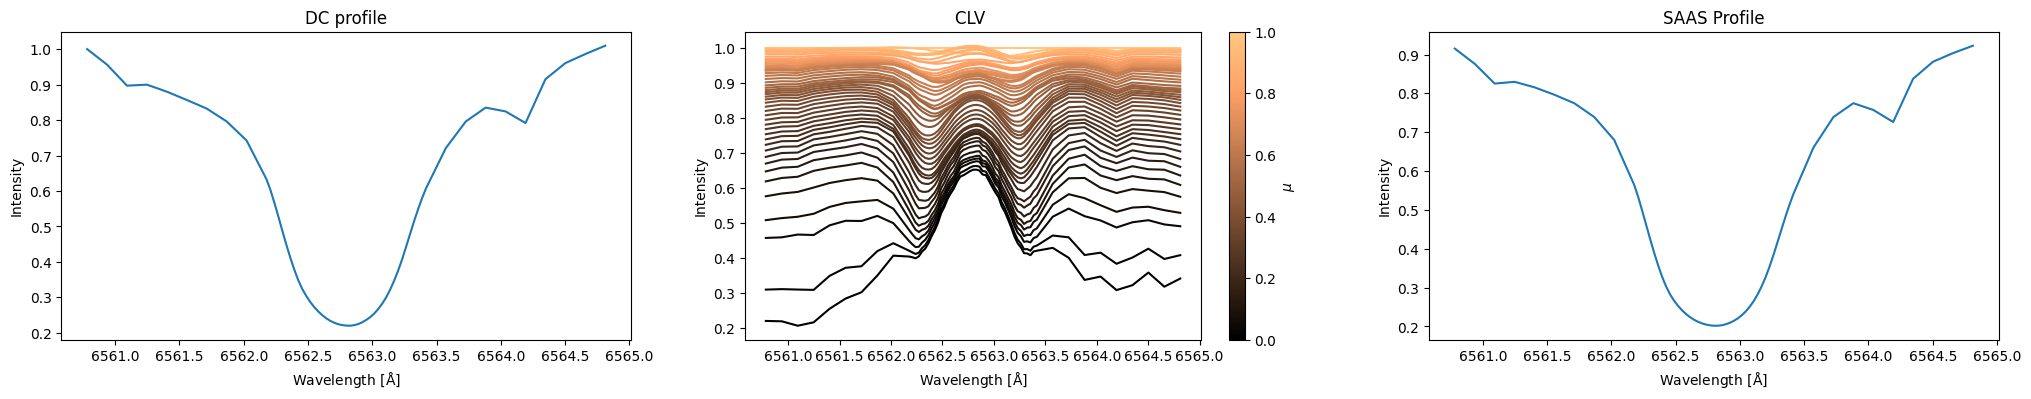

In [14]:
reload(un)
theor_Ha = un.linestudier("D:/solar flares/data/2017-09-06/fits/6563_clv.fits", nr=101)


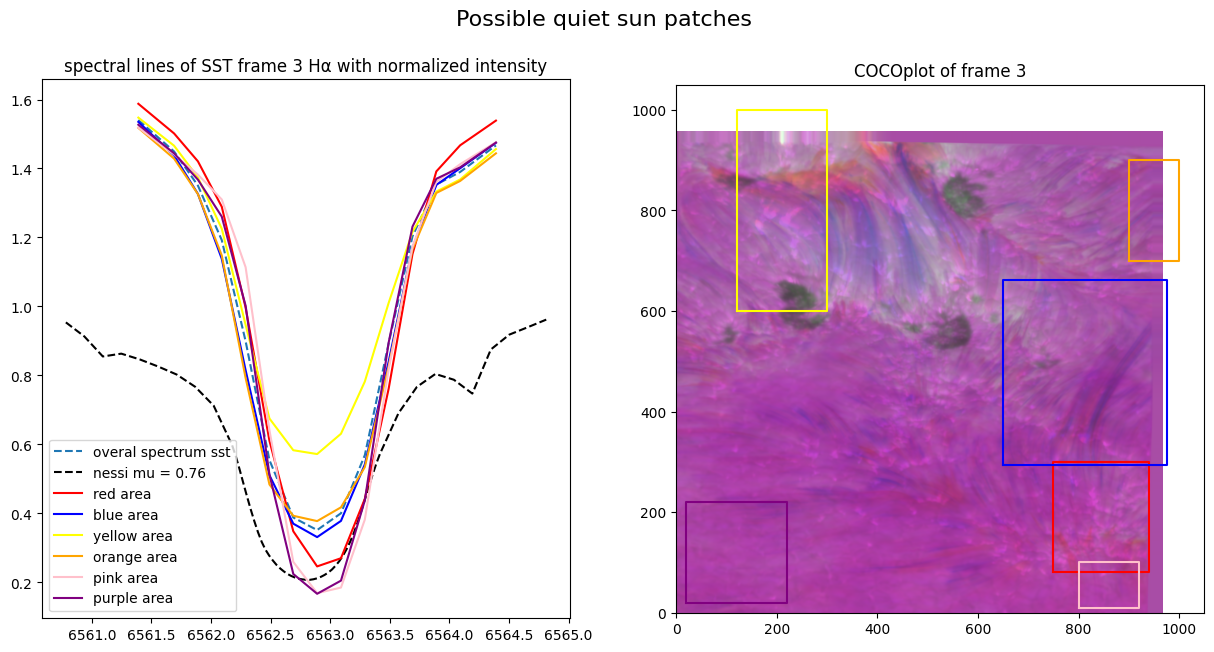

In [15]:
# %matplotlib widget
# %matplotlib inline
frame = 3

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(120,300), (600,1000)], [(900, 1000), (700, 900)], [(800,920), (10,100)] 
     , [(20,220), (20,220)]]

Ha.possible_quiet_sun_patches(frame, theor_line = theor_Ha, X=X)

In [16]:
# the chosen quiet sun patch is 
color_wanted_patch = "purple"

# choose from
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


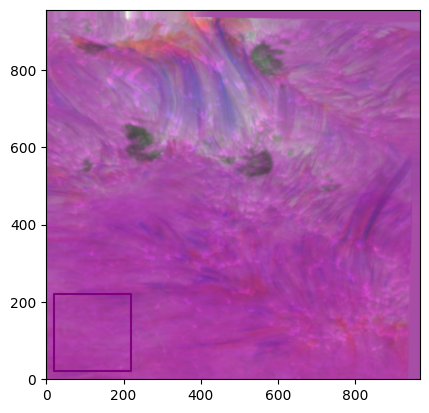

In [17]:
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
Ha.set_quiet_sun(frame, xlim, ylim, show=False, color=color_wanted_patch)

## Finding $\mu$

In [18]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.5214372738904437 for timeframe 0
does MU contain nan's? False
[[745. 805.]
 [745. 805.]] [[-263. -263.]
 [-203. -203.]]
Coundourplot succesfully saved.


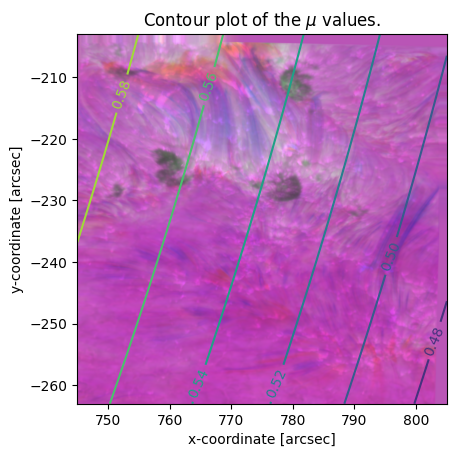

In [19]:



angle = 0
frame = 0    
position  =  (775, -233)

width = 60
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fyp = [position[0] - width / 2, position[0] + width / 2, *fyp]
extent = fyp
xx, yy, MU = extent_to_grid(extent, Ha.shape, invert=False, angle=angle)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=Ha,
    save=True,
    save_name=Ha.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


0.0012098914343879842


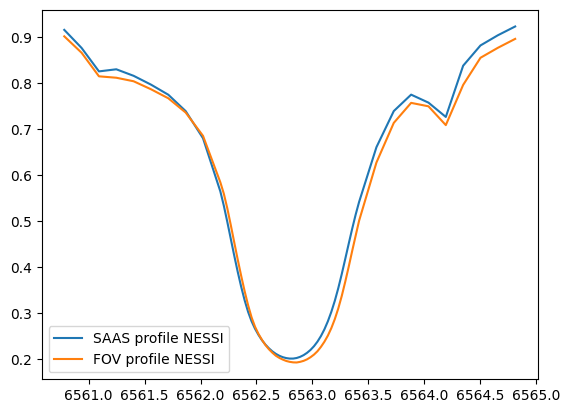

In [20]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63)

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


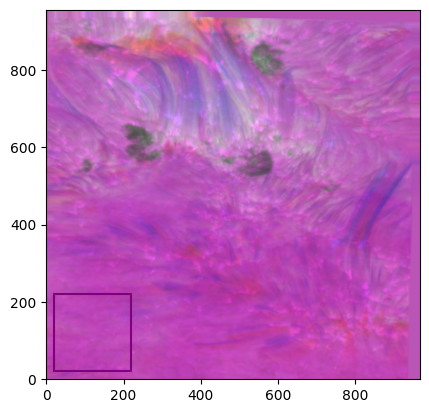

The quiet sun is pick at x (752.4146845915201, -255.49999999999997) with average              mu 0.5606691853548946


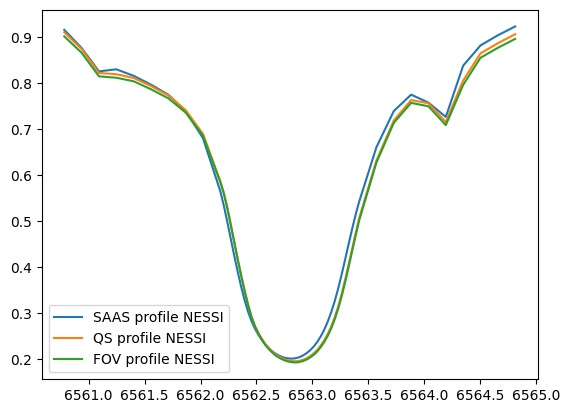

{'frame': 0, 'xlim': (20, 220), 'ylim': (20, 220), 'color': 'purple'}

In [21]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

[6561.38999988 6561.68999995 6561.89       6562.08999999 6562.28999998
 6562.48999999 6562.69       6562.89       6563.09       6563.29000001
 6563.49000002 6563.69000001 6563.89       6564.09000005 6564.39000012]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 371.8345712118176
        x: [ 6.526e-02 -2.566e-01  2.191e+00]
      nit: 12
      jac: [ 1.842e-03  4.078e-03  1.793e-03]
 hess_inv: [[ 1.583e-06 -2.075e-07  3.780e-07]
            [-2.075e-07  4.315e-06 -6.685e-06]
            [ 3.780e-07 -6.685e-06  1.324e-05]]
     nfev: 227
     njev: 54


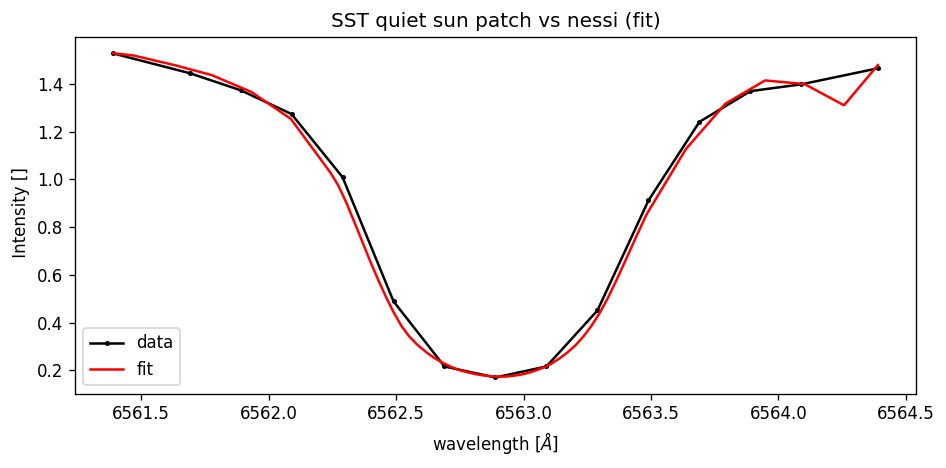

de p-waarde is  0.0019795711270382027 
Chi^2 reduced= 30.986214267651466 
aantal vrijheidgraden= 12 
chi^2= 371.8345712118176
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0019795711270382027 
Oftewel verwerp als p-waarde <lpha-niveau 


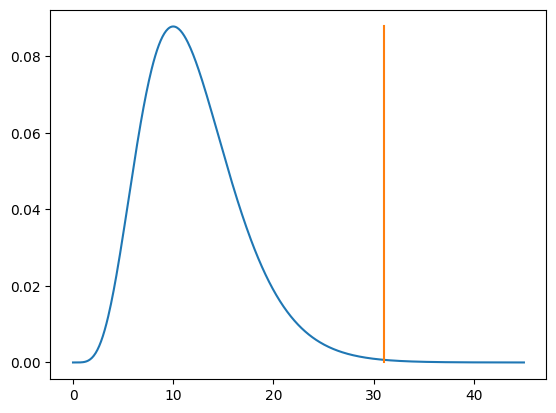

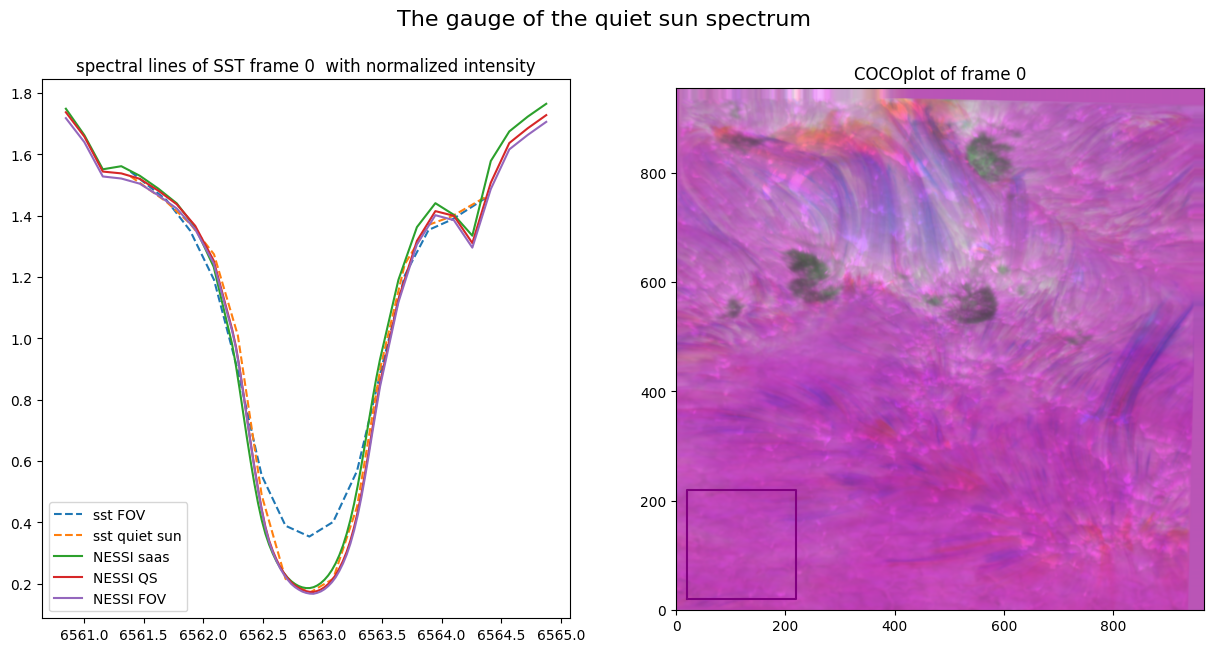

In [22]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

D:\solar flares/data/2017-09-06\use_nessi3.py:1669: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
D:\solar flares/data/2017-09-06\use_nessi3.py:1660: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
D:\solar flares/data/2017-09-06\use_nessi3.py:1657: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])


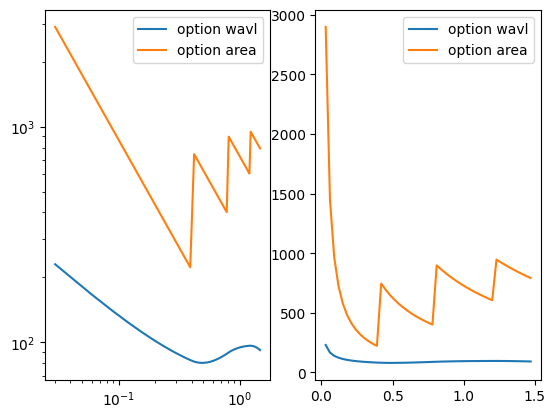

STD_Area = array([5795.80919759, 2897.9045988 , 1448.95229944,  965.96819962,
        724.47614971,  579.58091977,  482.98409981,  413.98637127,
        362.23807486,  321.98939987,  289.79045989,  263.44587262,
        241.4920499 ,  222.91573837,  745.43753403,  695.74169843,
        652.25784228,  613.88973391,  579.78474869,  549.26976192,
        521.80627382,  496.95835602,  474.36933984,  453.74458593,
        434.83856152,  417.44501906,  401.3894414 ,  897.88080568,
        865.81363405,  835.9579915 ,  808.09272511,  782.02521785,
        757.5869298 ,  734.6297501 ,  713.02299275,  692.65090724,
        673.41060426,  655.21031766,  637.96794088,  621.60978855,
        606.06954384,  946.44424594,  923.90985913,  902.42358333,
        881.91395644,  862.31586852,  843.56987138,  825.62157624,
        808.42112674,  791.9227364 ]), STD_Wavl = array([  0.        , 230.17681662, 166.79439767, 139.4814638 ,
       123.64753235, 113.14555279, 105.61678442,  99.93883843,
        9

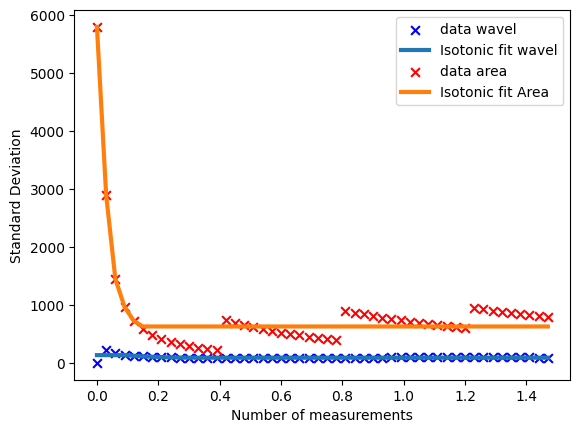

D:\solar flares/data/2017-09-06\use_nessi3.py:1734: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.42\AA$.
at an intesity of 6.182010402420724e-07. For a standard deviation of 628.5295079250909.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.42\AA$.
at an intesity of 4.322136044904909e-06. For a standard deviation of 89.89943666400202.



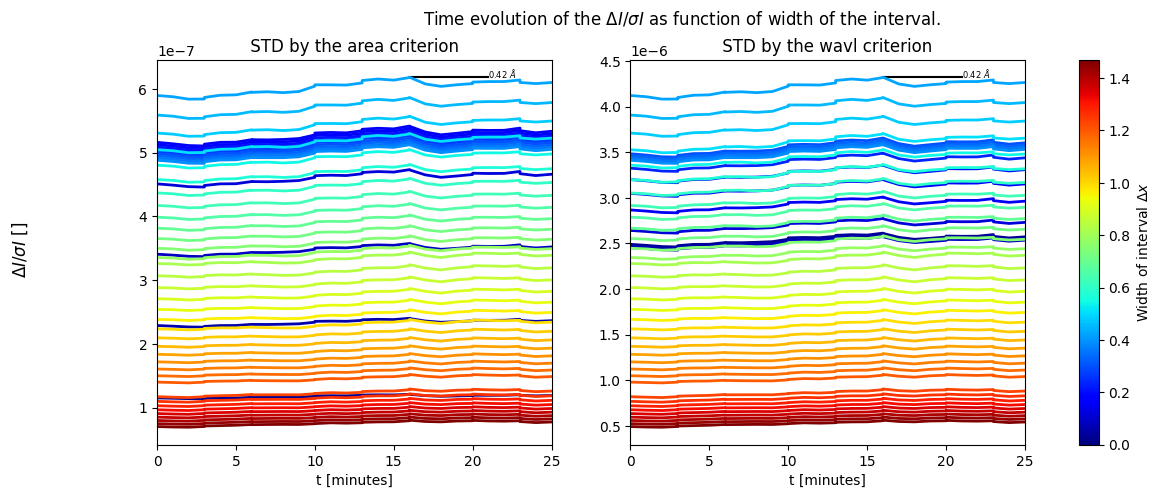

D:\solar flares/data/2017-09-06\use_nessi3.py:1902: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


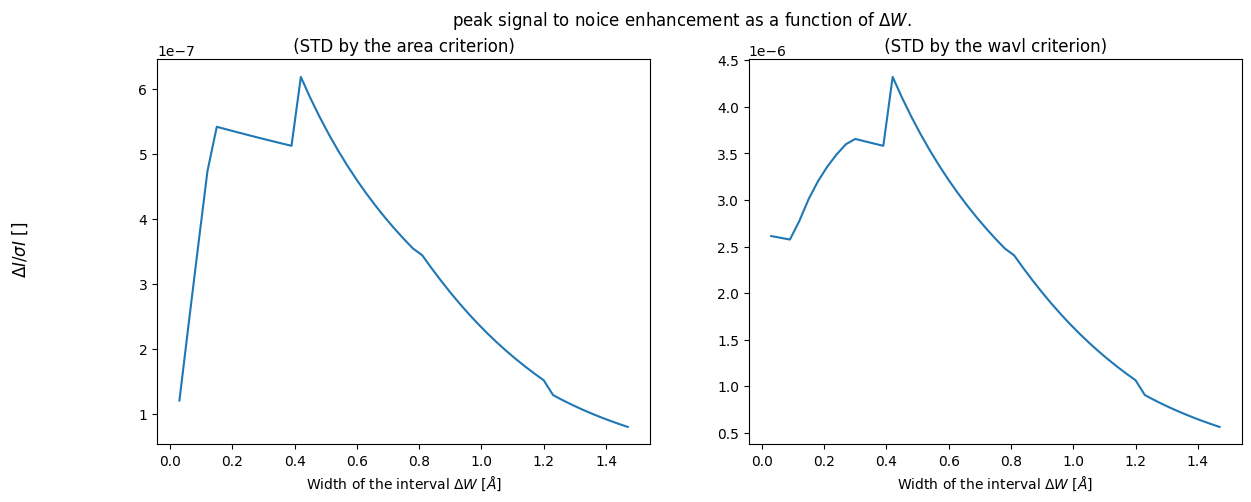

Directory 'line_data/optimal_width' already exists.


(array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.15222215e-07, 1.14699698e-07, 1.14096410e-07, ...,
         1.16473685e-07, 1.16542766e-07, 1.16688415e-07],
        [2.28765838e-07, 2.27740751e-07, 2.26535891e-07, ...,
         2.31283220e-07, 2.31419392e-07, 2.31719906e-07],
        ...,
        [7.98595362e-08, 7.91563126e-08, 7.87836311e-08, ...,
         8.26582984e-08, 8.24685206e-08, 8.17249613e-08],
        [7.49258483e-08, 7.42257988e-08, 7.38824538e-08, ...,
         7.76154375e-08, 7.74244077e-08, 7.66851524e-08],
        [7.02791324e-08, 6.95820758e-08, 6.92662980e-08, ...,
         7.28628343e-08, 7.26708040e-08, 7.19373477e-08]]),
 array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [2.48971065e-06, 2.47842015e-06, 2.46538436e-06, ...,
         2.51675229e-06, 2.51824500e-06, 2.52139217e-06],
        [2.47157522e-06, 

In [23]:
Deltas=np.arange(0,1.5, 0.03)
un.analyse_optimal_interval(Ha, Deltas)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [24]:
un.save_for_further_analysis(Ha, theor_Ha)
